# Featuring Engineering

**Feature engineering is the most important art in machine learning which creates the huge difference between a good model and a bad model.**

**It is also used for creating new input features from the existing ones**

**Why Featuring needed??**
1. You can isolate and highlight key information, which helps your algorithms "focus" on what’s important.
2. You can bring in your own domain expertise.
3. Most importantly, once you understand the "vocabulary" of feature engineering, you can bring in other people’s domain expertise!

**Two import tasks of Feature Engineering are:**
   * Preparing the proper input dataset, compatible with the machine learning algorithm requirements.
   * Improving the performance of machine learning models.

In [110]:
from IPython.display import Image

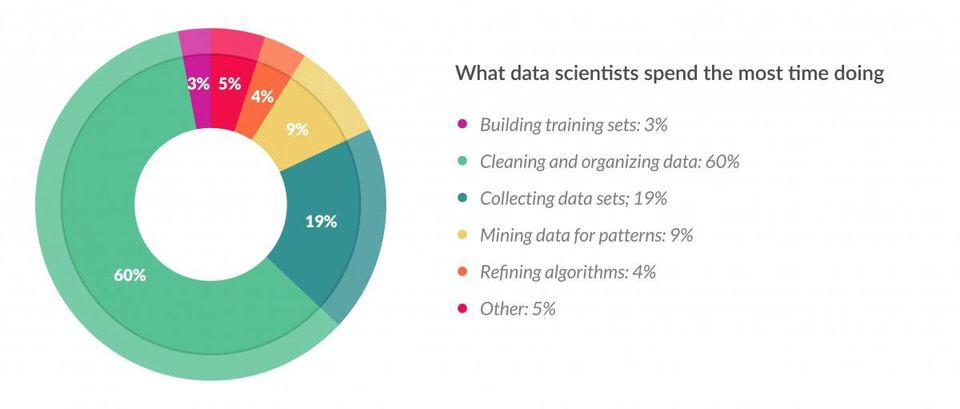

In [111]:
Image(filename = 'fmt.jpg', width = 1000)

#Source: https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/

**Basic Feature Engineering Techniques are:**
   1. Replacing the missing values - Imputation
   2. Outlier Treatment
   3. Binning
   4. Log Transform
   5. Replacing the catagorical variables - One-Hot Encoding
   6. Grouping Operations
   7. Feature Split
   8. Scaling
   9. Extracting Date 
   10. Sampling Techniques

**Here will discuss the feature engineering with a real time example**

# Context:
A retrospective sample of males in a heart-disease high-risk region of the Western Cape, South Africa. There are roughly two controls per case of CHD. Many of the CHD positive men have undergone blood pressure reduction treatment and other programs to reduce their risk factors after their CHD event. In some cases the measurements were made after these treatments. These data are taken from a larger dataset, described in Rousseauw et al, 1983, South African Medical Journal. 

# Problem Statement:
For the given attributes of a patient classify if the patient is suffering from heart disease or not

# Import necessary libraries

In [112]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids

# Import data

In [113]:
df = pd.read_csv('saheart.dat',sep = ',', header = 13, names = ['Sbp', 'Tobacco', 'Ldl', 'Adiposity',
                                                                'Famhist', 'Typea', 'Obesity', 'Alcohol', 'Age', 'Chd'])

In [114]:
df.head()

,Sbp,Tobacco,Ldl,Adiposity,Famhist,Typea,Obesity,Alcohol,Age,Chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


# 1. Imputation

* Missing values are one of the most common problems you can encounter when you try to prepare your data for machine learning. * The reason for the missing values might be: 
     1. Human errors, 
     2. interruptions in the data flow, 
     3. privacy concerns, and so on. 
      
**All these certainly affect the performance of the model**

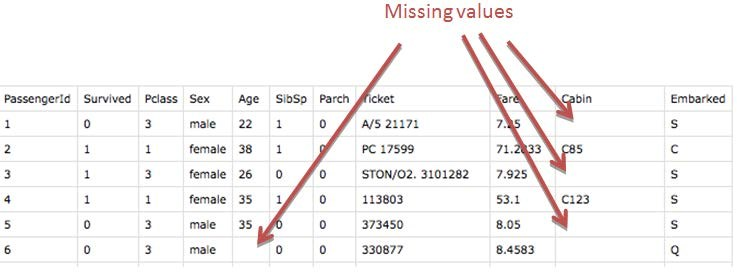

In [115]:
Image(filename = 'missing-values.png')

1. Some machine learning platforms automatically drop the rows which include missing values in the model training phase and it decreases the model performance because of the reduced training size.
2. Most of the algorithms donot accept datasets with missing values and gives an error.

**How can this be avoided??**

In [116]:
#we can use **df.Isnull().sum()** for finding the missing values in that particular column

**1. Normally we can replace the missing values with the respective column mean or median**

**2. We can also remove the respective missing value rows or in rare case columns with a threshold**

**3. There is no optimum threshold but you can use 70% as an example value and try to drop the rows and columns which have missing values with higher than this threshold.**

In [117]:
# threshold = 0.7
# Dropping columns with missing value rate higher than threshold
# df = df[df.columns[df.isnull().mean() < threshold]]

# Dropping rows with missing value rate higher than threshold
# df = df.loc[df.isnull().mean(axis=1) < threshold]

**Imputation is better than droping rows and columns to maintain the datasize**

**How imputation can be done??**
1. We can replace the missing values with **zero** - ex: Count of the customers who visited last week, replacing it with zero would be a sensible solution.
2. Joining tables with different sizes and in this case, imputing 0 might be reasonable as well.
3. The best way is to replace with median of the respective columns as mean is sensitive to outliers
    

# Numerical Imputation

In [118]:
#Filling all missing values with 0
#df = df.fillna(0)
#Filling missing values with medians of the columns
#df = df.fillna(df.median())

# Categorical Imputation

* Replacing with median or mean is not possible for catagorical variables. 
* So replacing those values are replaced with maximum occurred value in a column.
* When the catagorical values are evenly distributed then replacing becomes random selection 

In [119]:
#Max fill function for categorical columns
# df['column_name'].fillna(df['column_name'].value_counts().idxmax(), inplace=True)

# 2. Outlier Treatment

* The outliers can be found using statistical methods or using visual plots.
* Boxplot a visualization technique is best for identiying the outliers with more precesion

**The statistical methods used for dtecting the outliers are standard deviation, and percentiles**

# Outlier Detection with Standard Deviation

In [120]:
#Dropping the outlier rows with standard deviation
#factor = 3
#upper_lim = df['column'].mean () + df['column'].std () * factor
#lower_lim = df['column'].mean () - df['column'].std () * factor

#df = df[(df['column'] < upper_lim) & (df['column'] > lower_lim)]

**There is no trivial solution for factor, but usually, a value between 2 and 4 seems practical**

# Outlier Detection with Percentiles

In [121]:
#Dropping the outlier rows with Percentiles
#upper_lim = df['column'].quantile(.95)
#lower_lim = df['column'].quantile(.05)

#df = df[(df['column'] < upper_lim) & (df['column'] > lower_lim)]

# An Outlier Dilemma: Drop or Cap

* On few cases we can CAP the outliers rather than dropping it. 
* The data size will be maintained and performance could be better

In [122]:
#Capping the outlier rows with Percentiles
#upper_lim = data['column'].quantile(.95)
#lower_lim = data['column'].quantile(.05)
#data.loc[(df[column] > upper_lim),column] = upper_lim
#data.loc[(df[column] < lower_lim),column] = lower_lim

# 3. Binning

**Binning or discretization is the process of transforming numerical variables into categorical counterparts.**
* Example is to bin values for Age into categories such as 20-39, 40-59, and 60-79.
* Numerical variables are usually discretized in the modeling methods based on frequency tables (e.g., decision trees). 
* Moreover, binning may improve accuracy of the predictive models by reducing the noise or non-linearity. 
* Finally, binning allows easy identification of outliers, invalid and missing values of numerical variables.

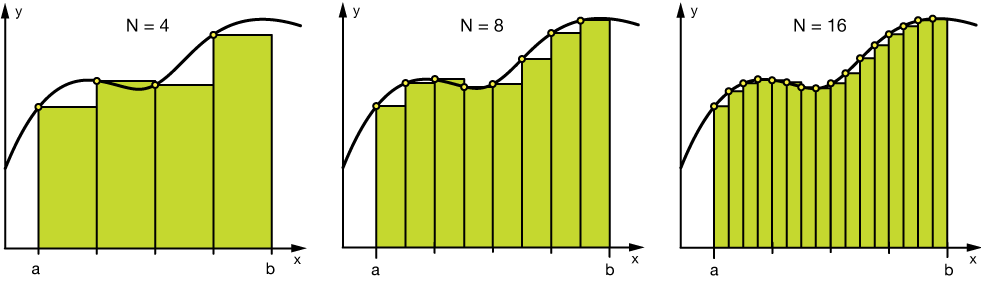

In [123]:
Image(filename = 'binning.png',width =500)

In [124]:
# df['bin'] = pd.cut(df['value'], bins=[0,40,70,100], labels=["poor", "avg", "good"])

# 4. Log Transform

**Logarithm transformation (or log transform) is one of the most commonly used mathematical transformations in feature engineering.**

* It helps to handle skewed data and after transformation, the distribution becomes more approximate to normal.
* It also decreases the effect of the outliers, due to the normalization of magnitude differences and the model become more robust.

In [125]:
#Log Transform Example
data = pd.DataFrame({'value':[2,45, -23, 85, 28, 2, 35, -12]})
data['log+1'] = (data['value']+1).transform(np.log)

#Negative Values Handling
#Note that the values are different
data['log'] = (data['value']-data['value'].min()+1) .transform(np.log)

In [126]:
data

,value,log+1,log
0,2,1.098612,3.258097
1,45,3.828641,4.234107
2,-23,NaN,0.000000
3,85,4.454347,4.691348
4,28,3.367296,3.951244
5,2,1.098612,3.258097
6,35,3.583519,4.077537
7,-12,NaN,2.484907


**Note:**
The data you apply log transform must have only positive values, otherwise you receive an error. Also, you can add 1 to your data before transform it. Thus, you ensure the output of the transformation to be positive.

# 5. One-hot encoding

**One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.**

*This method changes your categorical data, which is challenging to understand for algorithms, to a numerical format and enables you to group your categorical data without losing any information.*

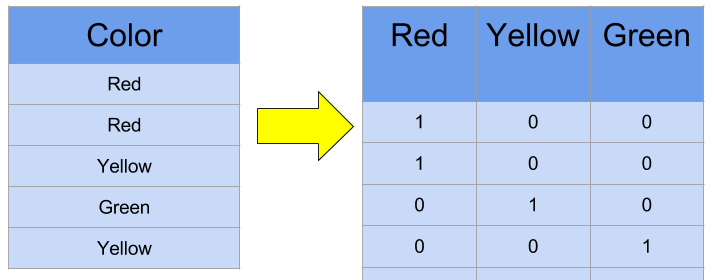

In [127]:
Image(filename = 'one_hot.png',width = 500)

In [128]:
# encoded_columns = pd.get_dummies(df['column'])
# data = df.join(encoded_columns).drop('column', axis=1)

# 6. Grouping Operations

**Grouping is an essential part of data analyzing in Pandas. We can group similar types of data and implement various functions on them.**

The key point of group by operations is to decide the aggregation functions of the features. For numerical features, average and sum functions are usually convenient options, whereas for categorical features it more complicated.

**Aggregation**

Pandas provide us with a variety of aggregate functions. These functions help to perform various activities on the datasets. The functions are:

> * count(): This gives a count of the data in a column.
> * sum(): This gives the sum of data in a column.
> * min() and .max(): This helps to find the minimum value and maximum value, ina function, respectively.
> * mean() and .median(): Helps to find the mean and median, of the values in a column, respectively.

# Categorical Column Grouping

**There are three ways of grouping categorical variables**

**The first option is to select the label with the highest frequency.** 
* *In other words, this is the max operation for categorical columns, but ordinary max functions generally do not return this value, you need to use a lambda function for this purpose.*

In [129]:
#df.groupby('column').agg(lambda x: x.value_counts().index[0])
#df.groupby('column').[id].count()

**Second option is to make a pivot table.**

* *Pivot table is used for clustering multiple features into aggregated features.*
* *As like one-hot enconding which is used for binary catagoraization, pivot table is used for multiple feature catagoraization*

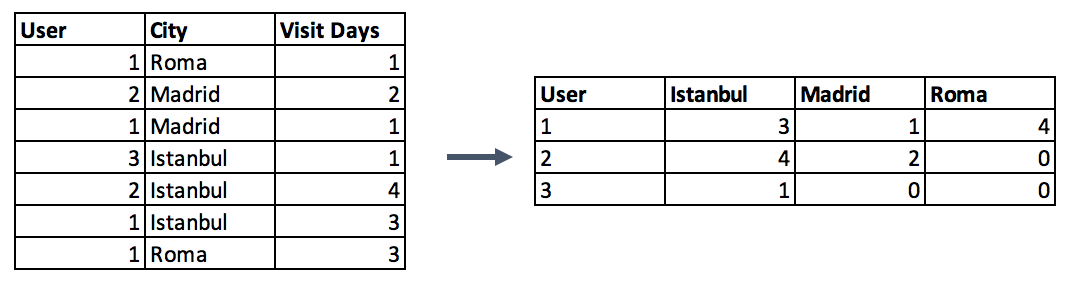

In [130]:
Image(filename = 'pivot.png',width = 700)

In [131]:
#data.pivot_table(index='column_to_group', columns='column_to_encode', values='aggregation_column', aggfunc=np.sum, fill_value = 0)

**Last categorical grouping option is to apply a group by function after applying one-hot encoding.** 
* This method preserves all the data -in the first option you lose some-, and in addition, you transform the encoded column from categorical to numerical in the meantime. 

# Numerical Column Grouping

* Numerical columns are grouped using sum and mean functions in most of the cases. 
* Both can be preferable according to the meaning of the feature.

In [132]:
#sum_cols: List of columns to sum
#mean_cols: List of columns to average

#grouped = data.groupby('column_to_group')

#sums = grouped[sum_cols].sum().add_suffix('_sum')
#avgs = grouped[mean_cols].mean().add_suffix('_avg')

#new_df = pd.concat([sums, avgs], axis=1)

# 7. Feature Split

* Splitting features helps machine learning when the dataset contains string columns which violates tidy data principles
* With the extraction of useful part from the column to a new feature
> * We enable machine learning algorithms to comprehend them.
> * Make possible to bin and group them.
> * Improve model performance by uncovering potential information.

**Note:**
    * Python allows us to create anonymous function i.e function having no names using a facility called lambda function. 
    * Lambda functions are small functions usually not more than a line. 
    * It can have any number of arguments just like a normal function.
    * Also there is no need for any return statement in lambda function

# 8. Scaling

* Most of the features in the dataset will not be identical.
* Most numerical features will have different ranges compared to the neighbouring ones (eg: height and weight of the same paerson)
* Few algorithms like k-NN and other distance based algorithms has scaling process mandatory

**a. Normalization**
It is given as -> (X-Xmin) / (Xmax - Xmin)

In [133]:
data = pd.DataFrame({'value':[2, 45, -23, 85, 28, 2, 35, -12]})
data['normalized'] = (data['value'] - data['value'].min()) / (data['value'].max() - data['value'].min())
data['normalized']

0    0.231481
1    0.629630
2    0.000000
3    1.000000
4    0.472222
5    0.231481
6    0.537037
7    0.101852
Name: normalized, dtype: float64

**b. Standardization or Z-Score normalization**
It is given as - > z = (x - mean) / S.D

In [134]:
data = pd.DataFrame({'value':[2, 45, -23, 85, 28, 2, 35, -12]})
data['standardized'] = (data['value'] - data['value'].mean()) / data['value'].std()
data['standardized']

0   -0.518878
1    0.703684
2   -1.229670
3    1.840952
4    0.220346
5   -0.518878
6    0.419367
7   -0.916922
Name: standardized, dtype: float64

# 9. Extracting Date

* Always date has an important correlation with the traget variables.
* But the Machine learning algorithm finds it difficult to understand the format of it representation
* So most of the times we remove the date column

**If some arrangements that can be made so that the ML algortihms can understand the dates, it will certainly improve the performance of the model.**
> * *Extracting the parts of the date into different columns: Year, month, day, etc.*
> * *Extracting the time period between the current date and columns in terms of years, months, days, etc.*
> * *Extracting some specific features from the date: Name of the weekday, Weekend or not, holiday or not, etc.*

In [135]:
from datetime import date

data = pd.DataFrame({'date':
['01-01-2017',
'04-12-2008',
'23-06-1988',
'25-08-1999',
'20-02-1993',
]})

#Transform string to date
data['date'] = pd.to_datetime(data.date, format="%d-%m-%Y")

#Extracting Year
data['year'] = data['date'].dt.year

#Extracting Month
data['month'] = data['date'].dt.month

#Extracting passed years since the date
data['passed_years'] = date.today().year - data['date'].dt.year

#Extracting passed months since the date
data['passed_months'] = (date.today().year - data['date'].dt.year) * 12 + date.today().month - data['date'].dt.month

#Extracting the weekday name of the date
data['day_name'] = data['date'].dt.day_name()

In [136]:
data

,date,year,month,passed_years,passed_months,day_name
0,2017-01-01,2017,1,3,41,Sunday
1,2008-12-04,2008,12,12,138,Thursday
2,1988-06-23,1988,6,32,384,Thursday
3,1999-08-25,1999,8,21,250,Wednesday
4,1993-02-20,1993,2,27,328,Saturday


**Note:
Data Visuvalaisation is an import part for the Feature Engineering Process** 

# 10. Up-Sampling & Down-Sampling

* As the name suggests, the process of converting the sampling rate of a digital signal from one rate to another is Sampling Rate Conversion. 
* Increasing the rate of already sampled signal is Upsampling whereas decreasing the rate is called downsampling.

**Why up or down-sampling needed?**
* In binary classification algorithms if the target variable is imbalanced then algorithm will be biased towards the max target class.
* A skewed distribution of target values will cause an accuracy bias in algorithms and affect the performance of models negatively.
* So sampling helps in avoiding the bias.

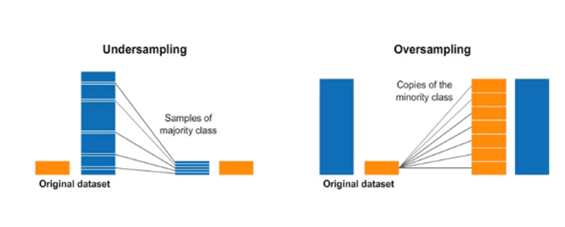

In [137]:
Image(filename='sampling.png')

**Up-Sampling:**
* Decide how many times the sample size of the minority class wants to be used and perform sampling with replacement in the minority class and sampling without replacement in the majority class. 
* Be careful with this strategy because it has the risk to trigger overfitting due to the repetition of the same observations in the minority class.

**Negative downsampling (imbalanced):**
* Different samples sizes are used in this procedure. 
* In all the samples all the observations from the minority class are kept and different number of observations from the majority class will be performed sampling without replacement.

# Imblearn techniques


Imbalanced learn techniques uses **Synthetic Minority Oversampling Technique - SMOTE** for imbalanced datasets to oversample the minority class

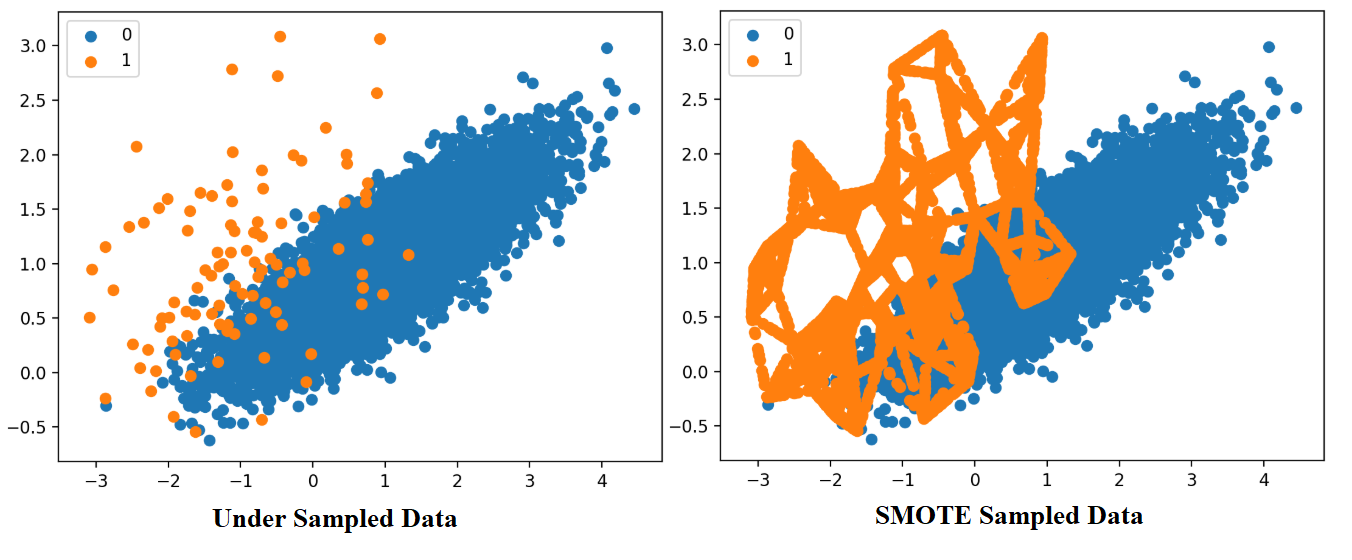

In [138]:
Image(filename = 'smote.png',width = 700)

Imbalanced learn techniques uses **Clustering Centroid Technique** for imbalanced datasets to undersample the majorty class

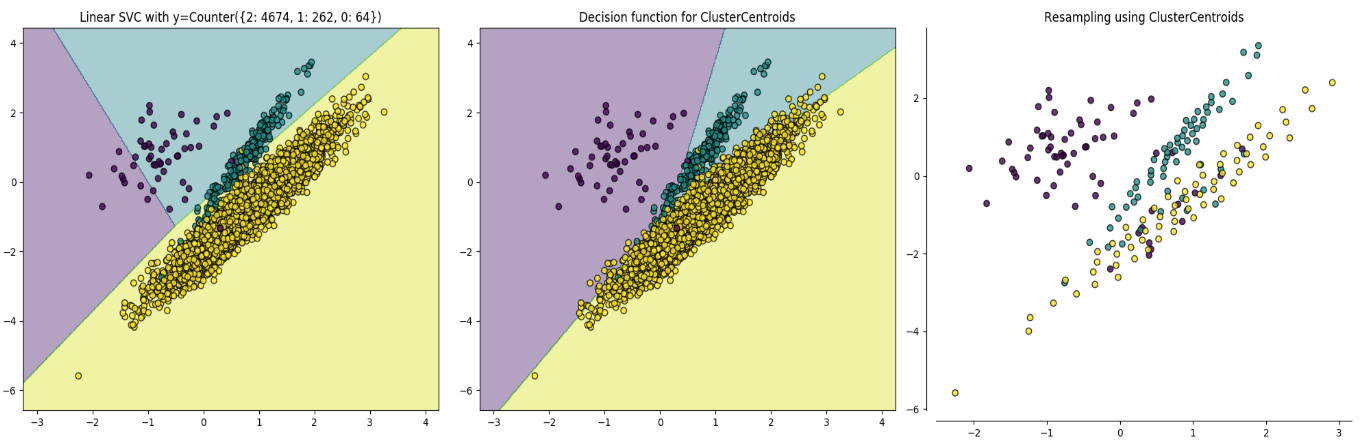

In [139]:
Image(filename = 'undersampling.png',width = 700)

# Brief Exploration of the data

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sbp        462 non-null    int64  
 1   Tobacco    462 non-null    float64
 2   Ldl        462 non-null    float64
 3   Adiposity  462 non-null    float64
 4   Famhist    462 non-null    object 
 5   Typea      462 non-null    int64  
 6   Obesity    462 non-null    float64
 7   Alcohol    462 non-null    float64
 8   Age        462 non-null    int64  
 9   Chd        462 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 36.2+ KB


- There are no null values in the data
- One of the features is object type, which we will have to encode

In [141]:
df.Chd.value_counts()

0    302
1    160
Name: Chd, dtype: int64

- The data is quiet imbalanced but would not consider it as highly imbalanced
- We will anyway up-sample the minority class

In [142]:
df.Famhist.replace(['Absent', 'Present'], [0,1], inplace = True)  # manually encoding the strings

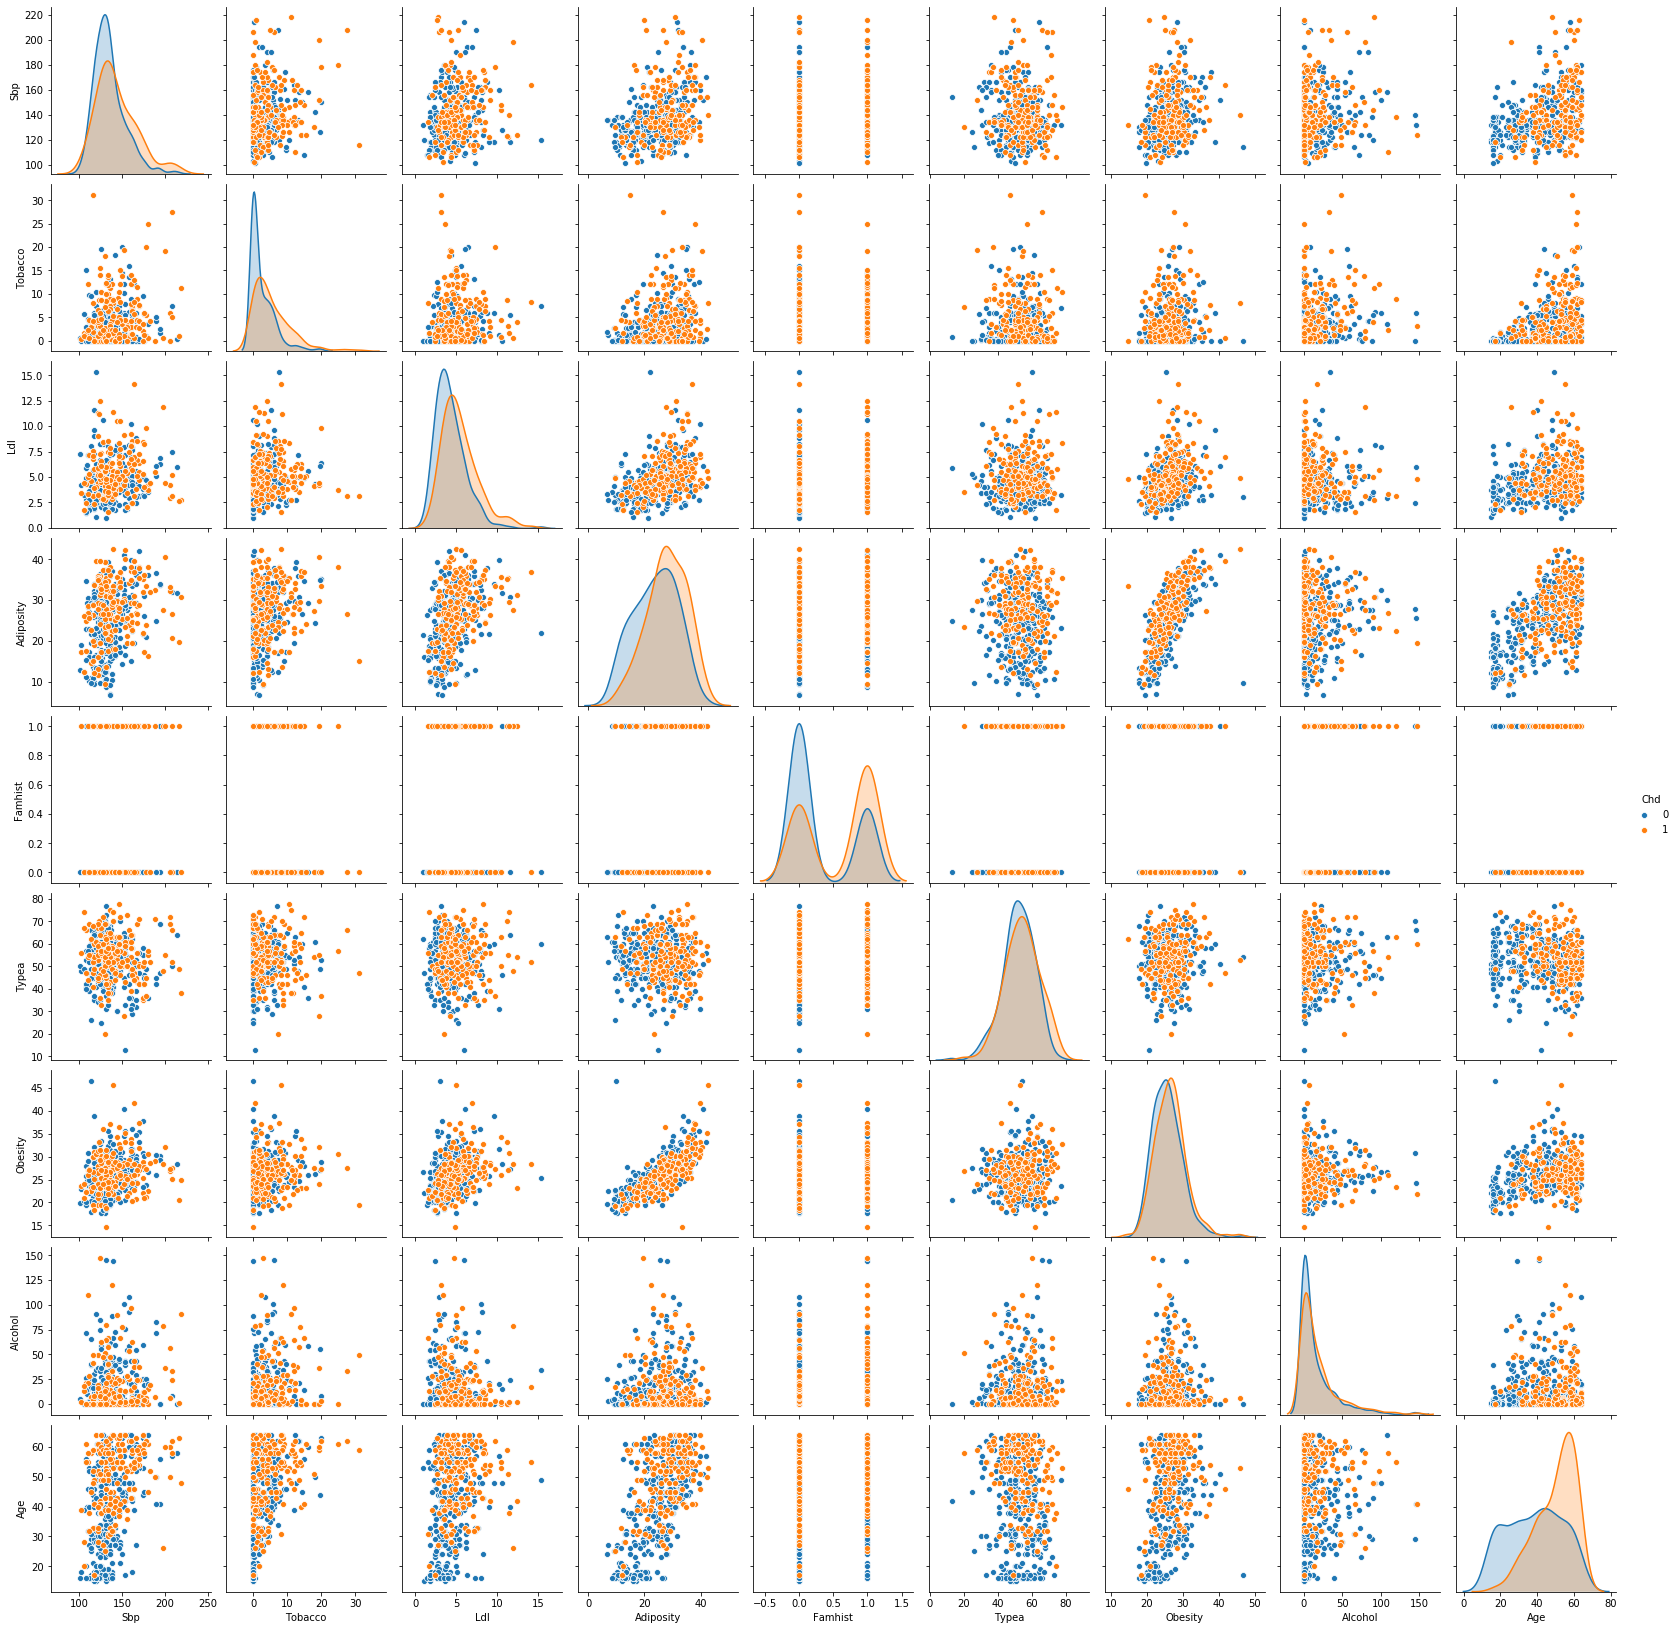

In [143]:
sns.pairplot(df, diag_kind= 'kde', hue = 'Chd')
plt.show()

- Age seems to be a good predictor of Chd
- There is some amout of correlation between Obesity and Adiposity

In [144]:
#X1 = df.drop(columns= ['Chd'])
X = df.drop(columns= ['Chd', 'Obesity'])
y = df.Chd

In [145]:
df.isnull().sum()

Sbp          0
Tobacco      0
Ldl          0
Adiposity    0
Famhist      0
Typea        0
Obesity      0
Alcohol      0
Age          0
Chd          0
dtype: int64

Disclaimer: Before deciding to drop 'Obesity', we have gone through a couple of iterations of model building and dropping obesity resulted in better predictions

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, random_state = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((346, 8), (116, 8), (346,), (116,))

In [147]:
#extra_samples = df[df['Chd'] == 1].drop(columns = 'Obesity').sample(n = 120, random_state = 1)
#X_train = pd.concat([X_train, extra_samples.drop(columns='Chd')])
#y_train = pd.concat([y_train, extra_samples.Chd])

In [148]:
sm = SMOTE(sampling_strategy= 'minority', random_state= 1 )

X_train, y_train = sm.fit_resample(X_train, y_train)

- The cell before the one above is simple upsampling where we are duplicating the records
- In the subsequent cell, we have tried to use SMOTE to upsample
- The former gave us better results in this case

# Train and evaluate models
### Logistic Regression

In [149]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [150]:
lr_score = logreg.score(X_test, y_test)
print(f"Score : {lr_score}")

Score : 0.7241379310344828


In [151]:
pred = logreg.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test,pred).ravel()

In [152]:
lr_recall = round(tp/(tp+fn), 3)   # Of all the people with Chd, how many were recognised to have Chd
lr_precision = round(tp/(tp+fp), 3)  # Of all the people predicted to have Chd, how many did have Chd
lr_specificity =round(tn/(tn+fp),3)    # Of all the people without Chds, how many were recognised to not have Chd
type_1_error = fp    # People without Chd predicted to have Chd
type_2_error = fn    # People with Chd predicted to have no Chd

In [153]:
lr_recall, lr_precision, lr_specificity, type_1_error, type_2_error

(0.75, 0.577, 0.711, 22, 10)

AUC: 0.790


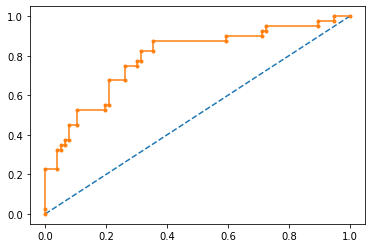

In [154]:
probs = logreg.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Decision Tree

In [155]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

dt_score = dt.score(X_test, y_test)
print(f"Score : {dt_score}")

pred = dt.predict(X_test)

tn, fp, fn, tp = metrics.confusion_matrix(y_test,pred).ravel()

Score : 0.5948275862068966


In [156]:
dt_recall = round(tp/(tp+fn), 3)   
dt_precision = round(tp/(tp+fp), 3)  
dt_specificity =round(tn/(tn+fp),3) 
dt_type_1_error = fp   
dt_type_2_error = fn  

In [157]:
dt_recall, dt_precision, dt_specificity, dt_type_1_error, dt_type_2_error

(0.425, 0.415, 0.684, 24, 23)

AUC: 0.555


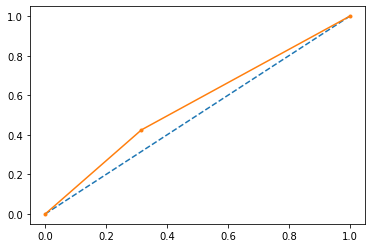

In [158]:
probs = dt.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Random forest

In [159]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
rf.fit(X_train, y_train)

rf_score = rf.score(X_test, y_test)
print(f"Score : {rf_score}")

pred = rf.predict(X_test)

tn, fp, fn, tp = metrics.confusion_matrix(y_test,pred).ravel()

Score : 0.6379310344827587


In [160]:
rf_recall = round(tp/(tp+fn), 3)   
rf_precision = round(tp/(tp+fp), 3)  
rf_specificity =round(tn/(tn+fp),3) 
rf_type_1_error = fp   
rf_type_2_error = fn 

In [161]:
rf_recall, rf_precision, rf_specificity, rf_type_1_error, rf_type_2_error

(0.6, 0.48, 0.658, 26, 16)

AUC: 0.729


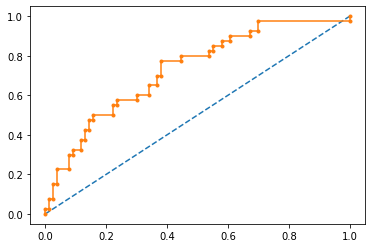

In [162]:
probs = rf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Adaboost

In [163]:
ac = AdaBoostClassifier()
ac.fit(X_train, y_train)

ac_score = ac.score(X_test, y_test)
print(f"Score : {ac_score}")

pred = ac.predict(X_test)

tn, fp, fn, tp = metrics.confusion_matrix(y_test,pred).ravel()

Score : 0.6379310344827587


In [164]:
ac_recall = round(tp/(tp+fn), 3)   
ac_precision = round(tp/(tp+fp), 3)  
ac_specificity =round(tn/(tn+fp),3) 
ac_type_1_error = fp   
ac_type_2_error = fn 

ac_recall, ac_precision, ac_specificity, ac_type_1_error, ac_type_2_error

(0.6, 0.48, 0.658, 26, 16)

AUC: 0.724


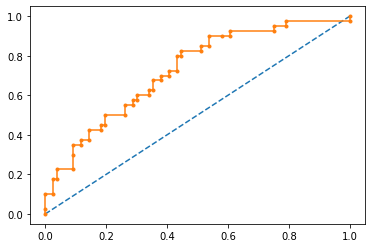

In [165]:
probs = ac.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Gradient Boost

In [166]:
gc = GradientBoostingClassifier()
gc.fit(X_train, y_train)

gc_score = gc.score(X_test, y_test)
print(f"Score : {gc_score}")

pred = gc.predict(X_test)

tn, fp, fn, tp = metrics.confusion_matrix(y_test,pred).ravel()

Score : 0.6551724137931034


In [167]:
gc_recall = round(tp/(tp+fn), 3)   
gc_precision = round(tp/(tp+fp), 3)  
gc_specificity =round(tn/(tn+fp),3) 
gc_type_1_error = fp   
gc_type_2_error = fn 

gc_recall, gc_precision, gc_specificity, gc_type_1_error, gc_type_2_error

(0.525, 0.5, 0.724, 21, 19)

AUC: 0.712


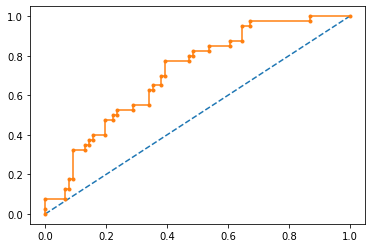

In [168]:
probs = gc.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Result

In [169]:
metric = np.array([[lr_recall, lr_precision, lr_specificity],
 [dt_recall, dt_precision, dt_specificity],
 [rf_recall, rf_precision, rf_specificity],
 [ac_recall, ac_precision, ac_specificity],
 [gc_recall, gc_precision, gc_specificity]]).T
 
metric

array([[0.75 , 0.425, 0.6  , 0.6  , 0.525],
       [0.577, 0.415, 0.48 , 0.48 , 0.5  ],
       [0.711, 0.684, 0.658, 0.658, 0.724]])

In [170]:
result = pd.DataFrame({'Model' : ['Logistic Regression', 'DecisionTree', 'Random Forest', 'Ada boost', "Gradient boost'"], 
                       'Accuracy' : [lr_score, dt_score, rf_score, ac_score, gc_score],
                      'Recall' : metric[0],
                      'Precision' : metric[1],
                      'Specificity' : metric[2]})
result

,Model,Accuracy,Recall,Precision,Specificity
0,Logistic Regression,0.724138,0.750,0.577,0.711
1,DecisionTree,0.594828,0.425,0.415,0.684
2,Random Forest,0.637931,0.600,0.480,0.658
3,Ada boost,0.637931,0.600,0.480,0.658
4,Gradient boost',0.655172,0.525,0.500,0.724


what worked:
* Dropping obesity - We have also seen that there was a good amount of correlation between Adiposity and Obesity
* Over sampling - Class imbalance was an essential part since our target column was highly imbalanced and we could not let the algorithms be biased against minority class